## 1. Сгенерировать 100 точек равномерно распределенных на интервале от 5 до 7

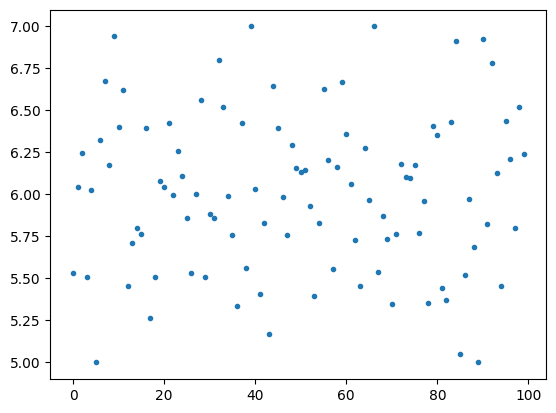

In [125]:
import numpy as np

N = 100
mu, sigma = (6, 0.5)

numbers = np.random.normal(mu, sigma, N)
numbers = np.clip(numbers, 5, 7)

plt.plot(numbers, '.')

(array([ 0.,  0.,  4., 20., 26., 30., 14.,  6.,  0.,  0.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 10 artists>)

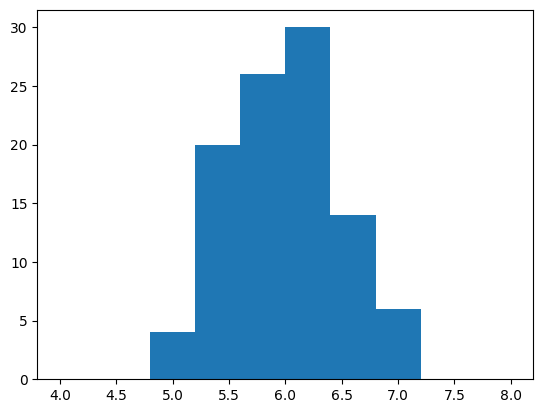

In [126]:
plt.hist(numbers, range=(4,8))

## 2. Подобрать (fit) наиболее подходящее под эту выборку нормальное распределение

In [127]:
from scipy.stats import norm
loc, scale = norm.fit(numbers)
loc, scale

(6.004773773208483, 0.4666458385858836)

## 3. Построить гистограмму реальной выборки и ожидаемое заполнение тех же интервалов подобранным распределением

(array([ 4.,  6., 14.,  9., 17., 17., 13.,  8.,  6.,  6.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

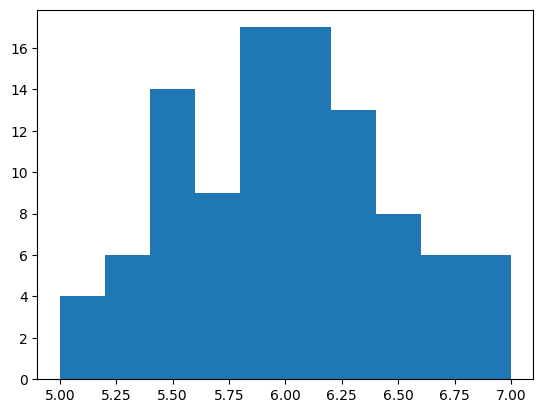

In [128]:
n_bin = 10
plt.hist(numbers, bins=n_bin)

(array([ 2.75328535,  5.70187426,  9.85365195, 14.21025591, 17.10171912,
        17.17572011, 14.39552641, 10.06870516,  5.87685898,  2.86240276]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

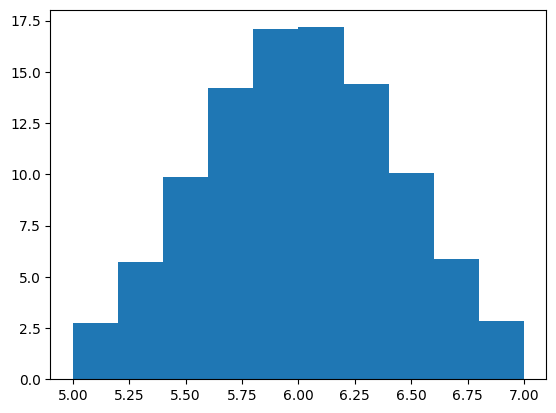

In [129]:
distribution = norm(loc, scale)
freqs, bins = np.histogram(numbers, range=(5, 7), bins=n_bin)
expected = np.diff(distribution.cdf(bins))
expected = expected/expected.sum() * N
plt.hist(x=(bins[:-1]+bins[1:])/2, bins=bins, weights=expected)

## 4. Оценить правдоподобие по критерию χ2, что данная выборка порождена этим нормальным распределением.

In [130]:
from scipy.stats import chisquare
chisquare(freqs, expected, ddof=2)

Power_divergenceResult(statistic=8.239781839531656, pvalue=0.31192594263345313)

В данном случае значение pvalue достаточно высокое, поэтому можно сказать, что данная выборка порождена этим нормальным распределением.